<a href="https://colab.research.google.com/github/denisecammarota/matbio/blob/master/tp4/P4_Ej2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 4 - Ejercicio 2**: *Switch genético*
***Matemática de los Sistemas Biológicos - 2021***

**Alumna**: Denise S. Cammarota

In [1]:
#importo librerías que me van a ser útiles en hacer las simulaciones
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('seaborn')

En este ejercicio, nos piden estudiar la dinámica de un sistema de dos genes con represión mutua, como modelada por el sistema dinámico:

\begin{align}
\dot{m_{1}} = \alpha_{m} g_{R}(p2) - \beta_{m} m_{1} \tag{1}, \\
\dot{m_{2}} = \alpha_{m} g_{R}(p1) - \beta_{m} m_{2} \tag{2}, \\ 
\dot{p_{1}} = \alpha_{p} m_{1} - \beta_{p} p_{1} \tag{3}, \\
\dot{p_{2}}= \alpha_{p} m_{2} - \beta_{p} p_{2} \tag{4}.
\end{align}

con tasas y funciones de represión iguales para ambos genes.


## Reducción del sistema a dos variables 

Si $\beta_{m} >> \beta_{p}$, entonces la dinámica está dominada por la proteína, dado que la degradación del mRNA sucede muy rápidamente. Por ello, podemos suponer que $\dot{m1} \approx \dot{m2} \approx 0$. Utilizando esto en las ecuaciones (1) y (2) obtenemos sendas expresiones para $m1$ y $m2$ en función de las concentraciones de proteínas y de los parámetros del problema:

\begin{align}
m_{1} = \frac{\alpha_{m}}{\beta_{m}} g_{R}(p_{2}) \tag{5}, \\
m_{2} = \frac{\alpha_{m}}{\beta_{m}} g_{R}(p_{1}) \tag{6}. \\
\end{align}

Reemplazando estas expresiones en las ecuaciones (3) y (4), obtenemos un sistema de dos ecuaciones diferenciales acopladas para $p1$ y $p2$. Entonces, hemos realizado la reducción a un sistema de dos variables, dado por las ecuaciones:

\begin{align}
\dot{p_{1}} = \alpha_{p} \frac{\alpha_{m}}{\beta_{m}} g_{R}(p_{2}) - \beta_{p} p_{1} \tag{7}, \\
\dot{p_{2}} = \alpha_{p} \frac{\alpha_{m}}{\beta_{m}} g_{R}(p_{1}) - \beta_{p} p_{2} \tag{8}
\end{align}




## Estudio del espacio de fases

Ahora, nos piden analizar el espacio de fases reducido a las proteínas. En especial, nos piden estudiar la bifurcación que produce la sensibilidad en la función de represión, controlada por $b$ o $c$. Recordamos que la función de represión, utilizada en el ejercicio anterior de la práctica está dada por:

\begin{align}
g_{R}(p) = \frac{a}{b + c p^{h}} \tag{9}, \\
\end{align}

donde la sensibilidad es la pendiente en el punto de inflexión de la curva. Observemos cómo, por ejemplo, los diferentes valores de $b$ afectan a la sensibilidad en los gráficos a continuación. En el primero, graficamos la función de represión para valores de parámetros fijos, únicamente cambiando $b$. En el segundo, hacemos lo mismo, pero, en vez de $g_{R}(p)$, graficamos su derivada. En ambos casos, observamos que aumentar $b$ disminuye la sensibilidad de la función de represión. Los parámetros fijos toman los valores $a = 5$, $c=2$ y $h = 3$. 


In [2]:
#función de represión
def g_rep(x,a,b,c,h):
  y = (a/(b + c*(x**h)))
  return y

In [3]:
#derivada de la función de represión
def g_rep_der(x,a,b,c,h):
  y = ((-a*h*c*(x**(h-1)))/(b + c*(x**(h)))**2)
  return y

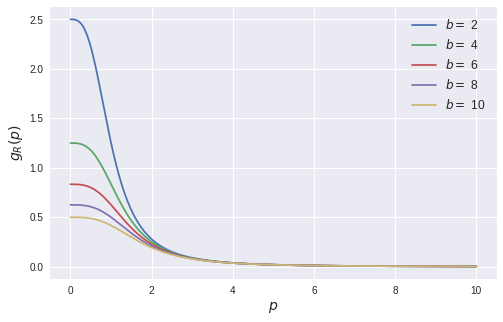

In [11]:
#diferentes valores para el parámetro b
b = [2,4,6,8,10]
a = 5
c = 2
h = 3
x = np.linspace(0,10,1000)
fig = plt.figure(figsize=(8,5))
for i in b:
  y = g_rep(x,a,i,c,h)
  plt.plot(x,y,label='$b =$ '+str(i))
plt.legend(fontsize=12)
plt.xlabel('$p$',fontsize=14)
plt.ylabel('$g_{R}(p)$',fontsize=14)
plt.show()

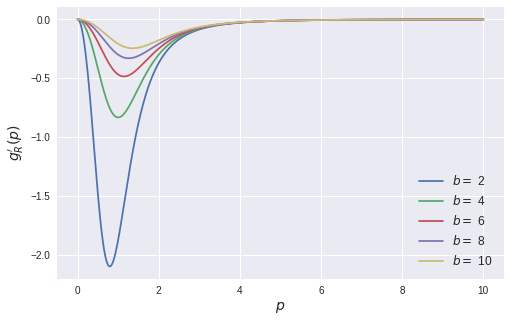

In [12]:
#diferentes valores para el parámetro b
b = [2,4,6,8,10]
a = 5
c = 2
h = 3
x = np.linspace(0,10,1000)
fig = plt.figure(figsize=(8,5))
for i in b:
  y = g_rep_der(x,a,i,c,h)
  plt.plot(x,y,label='$b =$ '+str(i))
plt.legend(fontsize=12)
plt.xlabel('$p$',fontsize=14)
plt.ylabel('$g^{\prime}_{R}(p)$',fontsize=14)
plt.show()


Ahora, estudiamos que pasa en el diagrama de fases con diferentes valores de $b$, dejando los parámetros de $g_{R}(p)$ del estudio anterior de la sensibilidad. Por otra parte, tomamos las tasas $\alpha_{m} = \alpha_{p} = 1$ y $\beta_{m} = \beta_{p} = 0.1$, valores utilizados en el ejercicio 1 de esta práctica. 

Nos enfocaremos en estudiar cuales son los equilibrios del sistema, y su estabilidad. Para encontrar los equilibrios, tenemos que igualar las ecuaciones (7) y (8) a cero. De esta manera, un equilibrio del sistema $(p_{1}^{*},p_{2}^{*})$ debe cumplir que:

\begin{align}
\dot{p_{1}}(p_{1}^{*},p_{2}^{*}) &= \alpha_{p} \frac{\alpha_{m}}{\beta_{m}} g_{R}(p_{2}^{*}) - \beta_{p} p_{1}^{*} = 0 \tag{9}, \\
\dot{p_{2}}(p_{1}^{*},p_{2}^{*}) &= \alpha_{p} \frac{\alpha_{m}}{\beta_{m}} g_{R}(p_{1}^{*}) - \beta_{p} p_{2}^{*} = 0 \tag{10}.
\end{align}

Estas son las ecuaciones para las **nulclinas** del sistema. Haciendo un paso algebráico extra llegamos al sistema:

\begin{align}
\dot{p_{1}}(p_{1}^{*},p_{2}^{*}) &= \alpha_{p} \frac{\alpha_{m}}{\beta_{m}} g_{R}(p_{2}^{*}) - \beta_{p} p_{1}^{*} = 0 \tag{9}, \\
\dot{p_{2}}(p_{1}^{*},p_{2}^{*}) &= \alpha_{p} \frac{\alpha_{m}}{\beta_{m}} g_{R}(p_{1}^{*}) - \beta_{p} p_{2}^{*} = 0 \tag{10},
\end{align}

que no tiene solución analítica. Sin embargo, podemos resolverlo gráficamente con dibujar ambas curvas en el espacio $p_{1}-p_{2}$. Los puntos en los que estas se crucen corresponderán a equilibrios del sistema. Primero, analizaremos cómo impactan los valores de $b$ a la cantidad de equilibrios que existen, dejando fijo el resto de los parámetros. Para ello, realizamos estos gráficos para distintos valores de $b$, como se observa en la celda siguiente.


In [6]:
def model_switchgenetico(y,t,am,ap,bm,bp,a,b,c,h):
  p1,p2 = y
  dp1dt = ap*(am/bm)*g_rep(p2,a,b,c,h) - bp*p1 
  dp2dt = ap*(am/bm)*g_rep(p1,a,b,c,h) - bp*p2
  return dp1dt,dp2dt

In [7]:
def nulclinas_switchgenetico(y,am,ap,bm,bp,a,b,c,h):
  p1,p2 = y
  yp1 = (ap*am/(bp*bm))*g_rep(p2,a,b,c,h)
  yp2 = (ap*am/(bp*bm))*g_rep(p1,a,b,c,h)
  return yp1,yp2

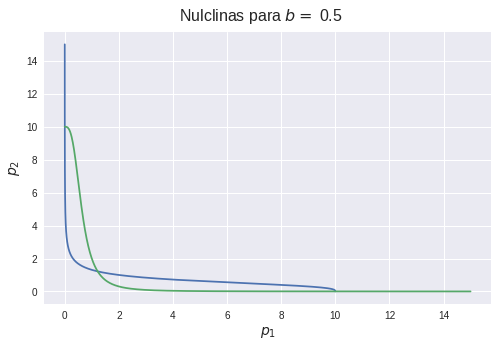

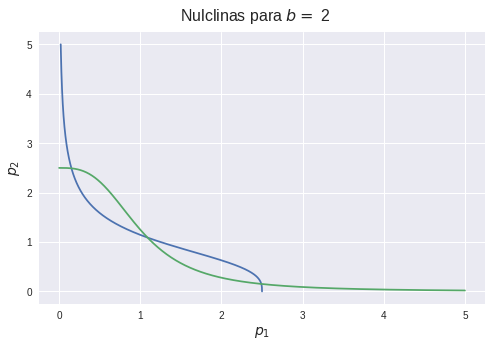

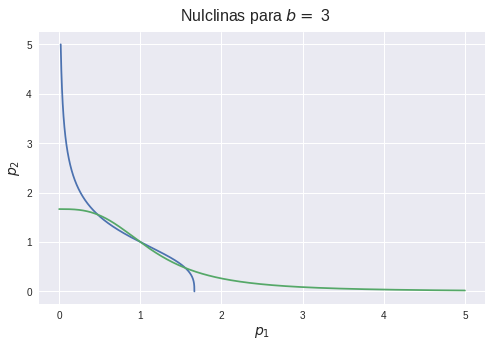

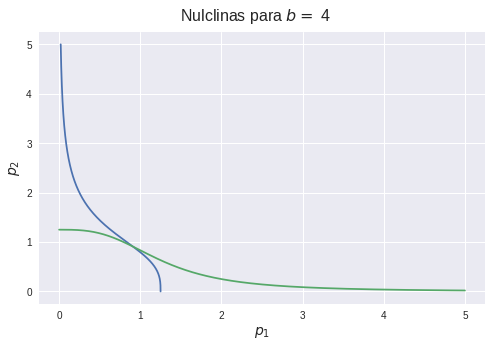

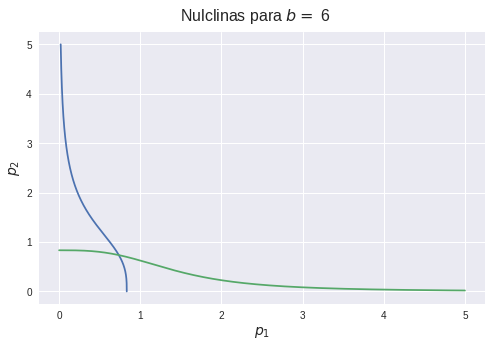

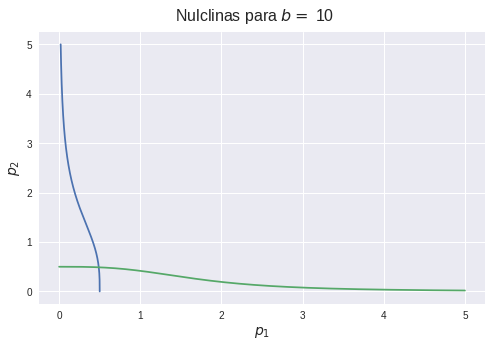

In [44]:
b = [0.5,2,3,4,6,10]
for i in b:
  if i == 0.5:
    p1 = np.linspace(0,15,1000)
    p2 = np.linspace(0,15,1000)
  else:
    p1 = np.linspace(0,5,1000)
    p2 = np.linspace(0,5,1000)
  z = p1,p2
  z = p1,p2
  am = ap = 1
  bm = bp = 1
  a = 5
  c = 2
  h = 3
  yp1,yp2 = nulclinas_switchgenetico(z,am,ap,bm,bp,a,i,c,h)
  fig = plt.figure(figsize=(8,5))
  plt.suptitle('Nulclinas para $b=$ '+str(i),fontsize=16,y=0.95)
  plt.plot(yp1,p2)
  plt.plot(p1,yp2)
  plt.xlabel('$p_{1}$',fontsize=14)
  plt.ylabel('$p_{2}$',fontsize=14)
  plt.show()